# линейная реграессия, разбор блокнота Луиса Серрано

In [104]:
from matplotlib import pyplot as plt
import numpy as np
import random

## определение и создание датасета

In [105]:
features = np.array([1, 2, 3, 5, 6, 7]) # признаки
labels = np.array([155, 197, 244, 356, 407, 448]) # метки

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


## нарисуем получившейся датасет

Text(0, 0.5, 'prices')

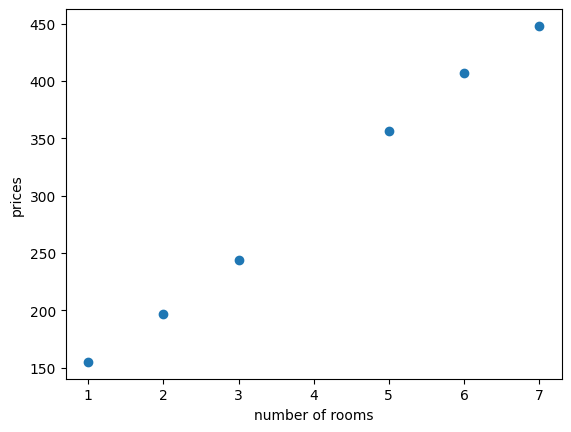

In [106]:
plt.plot(features, labels, 'o')
plt.xlabel('number of rooms')
plt.ylabel('prices')

## функция для обычного приближения прямой к точкам

    разбираем 4 случая:

1) точка выше прямой и справа
2) выше и слева
3) ниже и справа
4) ниже и слева

In [107]:
def simple_trick(base_price, room_price, num_rooms, price):

    predicted_price = base_price + room_price * num_rooms # y = kx + b
    small_1 = random.random() * 0.1
    small_2 = random.random() * 0.1
    
    if price > predicted_price and num_rooms > 0:
        room_price += small_1
        base_price += small_2

    if price > predicted_price and num_rooms < 0:
        room_price -= small_1
        base_price += small_2

    if price < predicted_price and num_rooms > 0:
        room_price -= small_1
        base_price -= small_2

    if price < predicted_price and num_rooms < 0:
        room_price += small_1
        base_price -= small_2

    return room_price, base_price # веса модели


## функция для квадратического приближения прямой к точкам

сводим 4 случая к 1

In [108]:
def square_trick(base_price, room_price, num_rooms, price, learning_rate):

    predicted_price = base_price + room_price * num_rooms # y = kx + b
    
    base_price += learning_rate * (price - predicted_price)
    room_price += learning_rate * (price - predicted_price) * num_rooms
    
    return room_price, base_price # k, b

## функция для абсолютного приближения

промежуточное звено между обычным и квадратическим подходами

сводим 4 к 2

In [109]:
def absolute_trick(base_price, room_price, num_rooms, price, learning_rate):

    predicted_price = base_price + num_rooms * room_price
    
    if price > predicted_price:
        room_price += learning_rate * num_rooms
        base_price += learning_rate
    else:
        room_price -= learning_rate * num_rooms
        base_price -= learning_rate
    
    return room_price, base_price 

# Алгоритм линейной регрессии

многократное повторение алгоритма для приближения прямой к точкам

In [110]:
import random
import matplotlib.pyplot as plt

def linear_regression(features, labels, learning_rate = 0.01, epochs = 10000):
    room_price = random.random()
    base_price = random.random()

    plt.plot(features, labels, 'o')
    plt.xlabel('number of rooms')
    plt.ylabel('prices')
    
    x = np.linspace(features[0], features[-1], 100)

    alpha_ = 0.1

    for epoch in range(epochs):

        # generate random index for slant and y-intersection
        i = random.randint(0, len(features) - 1)
        num_rooms = features[i]
        price = labels[i]
        
        # using square trick
        room_price, base_price = square_trick(
            base_price,
            room_price,
            num_rooms,
            price,
            learning_rate=learning_rate
        )

        y = room_price * x + base_price
        plt.plot(x, y, 'k', alpha = 0.1)
        
    plt.plot(features, labels, 'o')
    
    return room_price, base_price

слудующая строка кода запускает алгоритм линейной регрессии с признаками, метками, скоростью обучения = 0.01, количеством периодов = 10000

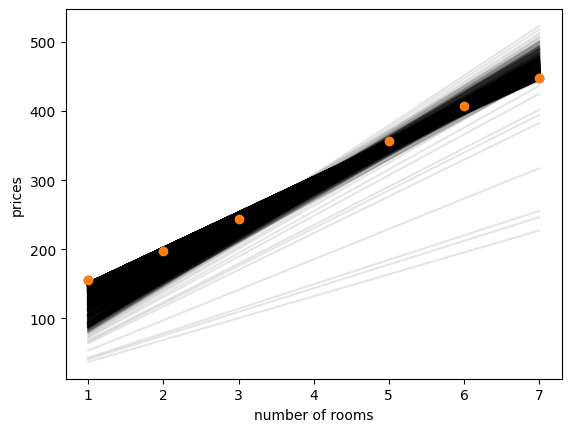

In [111]:
room_price, base_price = linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)